In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 3: EDA Fire Incident Data
<br>

### Table of Contents
[Introduction](#intro)<br>
1 - [The data](#data)<br>
2 - [Exploring data through tables and visuals](#tables_plots)<br>
3 - [Summarizing data](#summarize)<br>

### Introduction <a id='intro'></a>

In this homework, you will investigate fire incident data from the three California Investor Owned Utilities (IOUs). The main goal for this assignment is to establish different ways to explore your data and its limitations, as well as ways to summarize and re-organize data.

We will accomplish this by analyzing utility-reported data as well as weather data and utilizing exploratory data analysis (EDA).

### Topics Covered 

* Work with different file types
* Merge dataframes and perform operations to add new columns
* View data through lens of structure, granularity, scope, temporality and faithfulness
* Perform basic data cleaning operations

**Dependencies:**

In [2]:
# Run this cell to set up your notebook.
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from IPython.display import display, Latex, Markdown

----
## Section 1: The Data<a id='data'></a>

In this notebook, you'll be working with data from the [California Public Utilities Commission](https://www.cpuc.ca.gov/fireincidentsdata/). The three California IOUs (PG&E, SCE, and SDGE) are required to report fire incidents to the CPUC, along with certain characteristics of the fire and the electrical system in the area.

<br>**Question 1.1:** Look through the `data` folder and then load the .csv files into the homework so we can easily work with the data. These files were retrieved from the CPUC website, and small adjustments were made on Excel to make them easily retrievable in the notebook. The first example (PG&E) has been done for you.

Take a look at the arguments that are passed to the `read_csv` function. First, we specify the file location. We also set  `index_col` to `False`.  This forces numbered indices.  As an alternative we could have passed a number to `index_col`; if we pass $n$ in, then pandas uses the $n+1^{\text{st}}$ column of the csv as the index.

In [3]:
pge = pd.read_csv('data/PGEfireincidents.csv', index_col = False)

In [4]:
pge.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes
0,PG&E,6/10/14,15:14,40.205990,-122.253330,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,...,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact
1,PG&E,6/12/14,6:30,38.043750,-122.746240,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,...,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN
2,PG&E,6/13/14,9:19,36.933480,-121.388549,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,...,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN
3,PG&E,6/14/14,8:47,37.419005,-122.180770,Vegetation,Rural,< 3 meters,Unknown,NaN,...,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN
4,PG&E,6/14/14,11:01,37.130915,-121.091918,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,...,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN


Now load Southern California Edison ('SCEfireincidents.csv') and San Diego Gas and Electric ('SDGEfireincidents.csv') data

In [5]:
#sce = ... #YOUR ANSWER HERE
sce = pd.read_csv('data/SCEfireincidents.csv', index_col = False)

In [6]:
sce.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes
0,SCE,5/29/2014,18:00,33.9036301,-118.0386983,Other,Urban,Less Than 0.25 Acres,Fire Agency,Santa Fe Springs,...,Overhead,No,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN
1,SCE,6/5/2014,9:20,34.555046,-118.117789,Other,Rural,Less Than 0.25 Acres,Fire Agency,LA County,...,Overhead,No,NaN,NaN,Contact From Object,NaN,Other,Electric Facility,Unknown,NaN
2,SCE,6/8/2014,18:00,33.6808854,-117.9487188,Other,Urban,Less Than 0.25 Acres,Fire Agency,Huntington Beach,...,Overhead,No,NaN,NaN,Contact From Object,NaN,Balloons,Electric Facility,None,NaN
3,SCE,6/13/2014,13:00,35.7151,-118.511067,Vegetation,Rural,1000 - 4999 Acres,Fire Agency,Cal Fire,...,Overhead,No,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,NaN
4,SCE,6/18/2014,15:00,34.162642,-118.676722,Vegetation,Rural,0.26 - 9.99 Acres,Fire Agency,LA County,...,Overhead,Yes,6/18/2014,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN


In [7]:
#sdge = ... #YOUR ANSWER HERE
sdge = pd.read_csv('data/SDGEfireincidents.csv', index_col = False)

In [8]:
sdge.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes
0,SDG&E,1/1/2014,18:45,33.1179,-117.0780,Vegetation,Urban,Less Than .25 Acres,Customer,NaN,...,Overhead,Yes,1/1/2014,18:45,Equipment/Facility Failure,Splice/Clamp/Connector,NaN,NaN,Other,NaN
1,SDG&E,3/5/2014,9:49,33.2038,-117.1142,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Cal Fire,...,Overhead,Yes,3/12/2014,9:49,Equipment/Facility Failure,Splice/Clamp/Connector,NaN,NaN,NaN,NaN
2,SDG&E,4/15/2014,6:20,32.6778,-117.0460,Vegetation,Urban,Less Than .25 Acres,Fire Agency,S.D.F.D.,...,Overhead,No,NaN,NaN,Equipment/Facility Failure,Guy/Span Wire,NaN,NaN,None,NaN
3,SDG&E,4/17/2014,16:42,33.2203,-117.3380,Vegetation,Urban,Less Than .25 Acres,Fire Agency,OFD,...,Overhead,No,NaN,NaN,Contact From Object,NaN,Vehicle,Electric Facility,Human Error,NaN
4,SDG&E,4/27/2014,12:00,32.2415,-117.3470,Vegetation,Rural,Less Than .25 Acres,Utility,NaN,...,Overhead,No,NaN,NaN,Equipment/Facility Failure,Other,NaN,NaN,None,NaN


**Question 1.2**: We'll also be working with weather data from the National Oceanic and Atmospheric Administration (NOAA). [Daily Summary Data](https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND) was obtained for one land-based weather station per IOU service area from January 2014 to December 2016. Load the file noaa_dailysummary.csv below.

In [9]:
weather = pd.read_csv("data/noaa_dailysummary.csv")

In [10]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/1/2014,3.36,0.0,56.0,68,47
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/2/2014,2.68,0.0,58.0,71,47
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/3/2014,2.01,0.0,58.0,66,46
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/4/2014,1.79,0.0,60.0,66,56
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/5/2014,3.13,0.0,60.0,74,50


We're going to be merging fire incident data between each IOU and a land-based weather station in that IOU's service area. There are three weather stations in the dataframe `weather`, as shown in the output below. 'SAN DIEGO INTERNATIONAL AIRPORT, CA US' is in SDG&E's service area, 'SAN FRANCISCO DOWNTOWN, CA US' is in PG&E's service area, and 'RIVERSIDE MUNICIPAL AIRPORT, CA US' is in SCE's service area. <br>

Since we're going to use the `merge()` function in the next part and we need the fields that we merge on to have the same name, we started by renaming the "DATE" column in `weather` to match the "Fire Start Date" column in the iou dataframes using the function `.rename()`, and then converted the data type of all the date columns to `datetime` in the cell below.<br>

In [11]:
weather["NAME"].unique() # look at weather station values
weather.rename(columns = {"DATE":"Fire Start Date"}, inplace = True) # rename data column
for df in [pge, sce, sdge, weather]: # change date data type to datetime
    df["Fire Start Date"] = pd.to_datetime(df["Fire Start Date"], errors = "coerce")

**Question 1.3a**: For this question, create three new dataframes - `weather_sdge`, `weather_pge`, and `weather_sce` - that correspond to just the weather data in that IOU's service area.

In [12]:
weather_sdge = weather[weather["NAME"].str.contains("SAN DIEGO")]
weather_pge = weather[weather["NAME"].str.contains("SAN FRANCISCO")]
weather_sce = weather[weather["NAME"].str.contains("RIVERSIDE")]

In [13]:
weather_sdge.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-01,3.36,0.0,56.0,68,47
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-02,2.68,0.0,58.0,71,47
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-03,2.01,0.0,58.0,66,46
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-04,1.79,0.0,60.0,66,56
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-05,3.13,0.0,60.0,74,50


In [14]:
weather_pge.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
1096,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-01,NaN,0.0,NaN,63,44
1097,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-02,NaN,0.0,NaN,63,48
1098,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-03,NaN,0.0,NaN,64,49
1099,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-04,NaN,0.0,NaN,66,46
1100,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-05,NaN,0.0,NaN,66,48


In [15]:
weather_sce.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
2192,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-01,3.13,0.0,NaN,77,39
2193,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-02,3.58,0.0,NaN,82,49
2194,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-03,2.91,0.0,NaN,76,47
2195,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-04,1.34,0.0,NaN,71,45
2196,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-05,6.93,0.0,NaN,75,44


**Question 1.3b**: Merge each utility's fire incident and weather data and save the merged dataframe with the same name as the utility's fire incident dataframe (i.e. we should have three dataframes, `sdge`, `pge`, and `sce`, that contain fire incident and weather data). The data should be merged on the date fields.

In [16]:
pge = pge.merge(weather_pge, on = "Fire Start Date")
sce = sce.merge(weather_sce, on = "Fire Start Date")
sdge = sdge.merge(weather_sdge, on = "Fire Start Date")

In [17]:
print(pge.shape)

(1051, 31)


In [18]:
pge.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,40.205990,-122.253330,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,...,Electric Facility,Human Error,Conveyor belt contact,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55
1,PG&E,2014-06-12,6:30,38.043750,-122.746240,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,...,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52
2,PG&E,2014-06-13,9:19,36.933480,-121.388549,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,...,Pole,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54
3,PG&E,2014-06-14,8:47,37.419005,-122.180770,Vegetation,Rural,< 3 meters,Unknown,NaN,...,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54
4,PG&E,2014-06-14,11:01,37.130915,-121.091918,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,...,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54


In [19]:
sce.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,SCE,2014-05-29,18:00,33.9036301,-118.0386983,Other,Urban,Less Than 0.25 Acres,Fire Agency,Santa Fe Springs,...,NaN,Unknown,NaN,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.92,0.0,NaN,87,60
1,SCE,2014-06-05,9:20,34.555046,-118.117789,Other,Rural,Less Than 0.25 Acres,Fire Agency,LA County,...,Electric Facility,Unknown,NaN,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.25,0.0,NaN,91,58
2,SCE,2014-06-08,18:00,33.6808854,-117.9487188,Other,Urban,Less Than 0.25 Acres,Fire Agency,Huntington Beach,...,Electric Facility,None,NaN,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.47,0.0,NaN,91,59
3,SCE,2014-06-13,13:00,35.7151,-118.511067,Vegetation,Rural,1000 - 4999 Acres,Fire Agency,Cal Fire,...,NaN,Unknown,NaN,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",5.82,0.0,NaN,86,58
4,SCE,2014-06-18,15:00,34.162642,-118.676722,Vegetation,Rural,0.26 - 9.99 Acres,Fire Agency,LA County,...,NaN,Unknown,NaN,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.70,0.0,NaN,85,57


In [20]:
sdge.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,...,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,SDG&E,2014-01-01,18:45,33.1179,-117.0780,Vegetation,Urban,Less Than .25 Acres,Customer,NaN,...,NaN,Other,NaN,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",3.36,0.0,56.0,68,47
1,SDG&E,2014-03-05,9:49,33.2038,-117.1142,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Cal Fire,...,NaN,NaN,NaN,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",5.14,0.0,61.0,68,55
2,SDG&E,2014-04-15,6:20,32.6778,-117.0460,Vegetation,Urban,Less Than .25 Acres,Fire Agency,S.D.F.D.,...,NaN,None,NaN,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",5.82,0.0,63.0,69,59
3,SDG&E,2014-04-17,16:42,33.2203,-117.3380,Vegetation,Urban,Less Than .25 Acres,Fire Agency,OFD,...,Electric Facility,Human Error,NaN,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",7.38,0.0,62.0,65,60
4,SDG&E,2014-04-27,12:00,32.2415,-117.3470,Vegetation,Rural,Less Than .25 Acres,Utility,NaN,...,NaN,None,NaN,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",7.16,0.0,62.0,67,59


Before combining data from all three IOUs, we'll run the following `assert` statements to make sure that the column names are the same.

*Note*: because the reporting is standardized for these IOUs, and because of some Excel cleaning that was done beforehand, the column names should match up. But if you're working with a dataset where column names need to be changed, you can use the [`rename` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) or a value assigment (eg. `sdge.columns = sce.columns` would set the columns of `sdge` to be the same as those in `sce`, as long as you were certain that the columns represented the same values).

In [21]:
assert all(pge.columns == sce.columns)
assert all(sce.columns == sdge.columns)

Now, we can use [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) to combine all three dataframes into one, called `alliou`. Fill in the cell below to combine the three IOU dataframes. We want our new dataframe `alliou` to renumber the indices (otherwise we'd have three rows with row index = 0, three rows with row index = 1, etc.). Check the [`concat()` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) and make sure that you've set the appropriate argument to achieve this.

In [22]:
alliou = pd.concat([pge,sce,sdge], ignore_index = True)

In [23]:
pd.set_option('display.max_columns', 36)
alliou.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,40.206,-122.253,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55
1,PG&E,2014-06-12,6:30,38.0438,-122.746,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52
2,PG&E,2014-06-13,9:19,36.9335,-121.389,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54
3,PG&E,2014-06-14,8:47,37.419,-122.181,Vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54
4,PG&E,2014-06-14,11:01,37.1309,-121.092,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54


In [24]:
assert alliou.shape[0] > 1000
assert all(iou in alliou["Utility Name"].unique() for iou in ["PG&E", "SCE", "SDG&E"])

----

**Question 1.4:** 
Analyze the `alliou` table and see what data types are within the table. 
<br>What is the:
1. structure of the data?<br>
2. granularity of the data?<br>
3. scope of the data?<br>
4. temporality of the data?<br>
5. faithfulness of the data?<br>

Some questions to ask yourself:
* Structure - What was the format or file type of the imported data? Are there are any differences in data types between the individual IOU dataframes, the weather dataframe, and the combined dataframe?
* Granularity - What does each row of data represent? Do any of the fields represent aggregated data (data that is reduced or summarized in some way)? What's the resolution in time (eg. hourly, monthly) of the data?
* Scope - You can think of scope in different dimensions, but geographic scope and temporal scope is one place to start.
* Temporality - What do the dates and times represent?
* Faithfulness - Where do the data come from? Is there any reason to question it? 

Please make a couple observations for each category (structure, granularity, etc). The [NOAA's Daily Summary Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) might be a helfpul resource.

We won't include a detailed answer here, but two (accurate and relevant) observations for each category should give you full points. Answers should refer to both IOU data and weather data. Ch 5 of the Data 100 textbook is a good reference here.

**Question 1.5**: To get a basic estimate of weather conditions on the day of the fire incident, we took daily summaries from one weather station in the service area of each IOU. This approach isn't particularly granular - the IOU datasets provide more detail both in terms of geography and time than the weather data that we are using. Let's say you wanted to refine this approach to more effectively uncover the weather conditions in the location and at the time of the fire incident. In a few sentences, qualitatively describe an alternative approach. <br>
You don't have to specify any code or functions, but you should reference which columns you would use (either in the IOU or weather datasets) and which datasets you would use - you can take a look at [available NOAA data here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets).

Many answers are possible, but students should talk about how they would match between data sets both in space and in time (eg. using the NOAA's hourly data and getting data from multiple land-based stations and matching on the closest latitude and longitude would be one approach).

**Question 1.6:** What are the unique `Size` categories in the `alliou` table? Are there any redundancies in how the fire sizes are bucketed?

In [25]:
size_unique = alliou['Size'].unique()
size_unique

array(['< 0.25 Acres', '10 - 99 Acres', '< 3 meters', '.26 - 9.99 Acres',
       'Structure Only', '1000 - 4999 Acres', '300 - 999 Acres',
       '100 - 299 Acres', 'Less Than 0.25 Acres', '0.26 - 9.99 Acres',
       'Less Than .25 Acres', 'Greater than 5000 Acr'], dtype=object)

The unique `Size` categories are shown above, saved as array `size_unique`. There are redundancies in how the fire sizes were bucketed/entered. For example, '< 0.25 Acres' and 'Less Than 0.25 Acres' and 'Less Than .25 Acres' all represent the same value.

----
## Section 2: Exploring data through tables and visuals<a id='tables_plots'></a>

In this section, we'll do some data cleaning with the objective of exploring the fire incident data.

<br>**Question 2.1:** Create three dataframes, `alliou_2014`, `alliou_2015`, and `alliou_2016`, containing data from each year. You can use the [`.dt.year`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html) method to extract the year. 

In [26]:
alliou_2014 = alliou[alliou["Fire Start Date"].dt.year == 2014]
alliou_2015 = alliou[alliou["Fire Start Date"].dt.year == 2015]
alliou_2016 = alliou[alliou["Fire Start Date"].dt.year == 2016]

In [27]:
alliou_2014.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,40.206,-122.253,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55
1,PG&E,2014-06-12,6:30,38.0438,-122.746,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52
2,PG&E,2014-06-13,9:19,36.9335,-121.389,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54
3,PG&E,2014-06-14,8:47,37.419,-122.181,Vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54
4,PG&E,2014-06-14,11:01,37.1309,-121.092,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54


In [28]:
alliou_2015.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
254,PG&E,2015-01-08,15:18,37.3663,-121.883,Other,Rural,< 0.25 Acres,Fire Agency,SJFD,100566657,None,"12,000",Conductor,Subsurface,Yes,1/8/15,15:18,Contact From Object,N.A.,Vehicle,Electric Facility,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,63,51
255,PG&E,2015-01-10,13:07,38.089,-122.209,Vegetation,Urban,< 0.25 Acres,Utility: PG&E,NaN,102217759,NaN,"12,000",Conductor,Overhead,Yes,1/10/15,13:07,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,51
256,PG&E,2015-01-16,7:07,38.7753,-122.7,Vegetation,Rural,< 3 meters,Fire Agency,CAL FIRE,102167494,Pacific Bell,0 – 750,Conductor,Overhead,No,NaN,NaN,Unknown,N.A.,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,61,49
257,PG&E,2015-01-26,3:51,37.0539,-122.159,Vegetation,Rural,< 0.25 Acres,Fire Agency,CAL FIRE,NaN,NaN,"12,000",Conductor,Overhead,Yes,1/26/15,3:51,Contact From Object,N.A.,Vegetation,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,49
258,PG&E,2015-02-06,6:01,38.6059,-121.022,Vegetation,Rural,< 3 meters,Fire Agency,NaN,"6661 Ryan Ranch Road, El Dorado Hills",NaN,"21,000",Conductor,Overhead,Yes,2/6/15,6:01,Contact From Object,N.A.,Vegetation,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.7,NaN,64,58


In [29]:
alliou_2016.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
689,PG&E,2016-01-21,21:32,40.553,-124.112,Vegetation,RURAL,< 3 meters,Fire Agency,Cal Fire,100994021,PACIFIC BELL,"12,000",Conductor,Overhead,Yes,1/21/16,21:32,Contact From Object,N.A.,Vegetation,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.00,NaN,62,52
690,PG&E,2016-01-23,15:41,39.9486,-122.373,Vegetation,RURAL,< 0.25 Acres,Self Extinguished,N.A.,101524077,NaN,"12,000",Conductor,Overhead,Yes,1/23/16,15:41,Equipment/ Facility Failure,Splice/Clamp/Connector,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.01,NaN,57,52
691,PG&E,2016-02-02,6:01,37.7755,-122.441,Building,URBAN,Structure Only,Fire Agency,SFFD,101817610,PACIFIC BELL,0 – 750,Conductor,Overhead,Yes,2/2/16,6:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.15,NaN,55,46
692,PG&E,2016-02-05,20:50,40.0156,-122.433,Vegetation,RURAL,< 0.25 Acres,Fire Agency,TEHAMA COUNTY & LOCAL VOLUNTEER,101529688,None,"12,000",Conductor,Overhead,Yes,2/5/16,20:50,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.00,NaN,62,47
693,PG&E,2016-02-08,3:55,39.7852,-121.506,Vegetation,RURAL,< 0.25 Acres,Fire Agency,CAL FIRE/BUTTE COUNTY FIRE DEPT.,100337507,NaN,"12,000",Conductor,Overhead,Yes,2/8/16,3:55,Contact From Object,N.A.,Vegetation,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.00,NaN,75,55


**Question 2.2**: Use `pd.value_counts()` to get the number of reported fire incidents by utility and year. What do you notice about the relative number of reports by utility? What are some factors that could explain the differences in number of reports, particularly between PG&E and SCE?

In [30]:
# 2014
pd.value_counts(alliou_2014["Utility Name"])

PG&E     254
SCE       39
SDG&E     30
Name: Utility Name, dtype: int64

In [31]:
# 2015
pd.value_counts(alliou_2015["Utility Name"])

PG&E     435
SCE      107
SDG&E     32
Name: Utility Name, dtype: int64

In [32]:
# 2016
pd.value_counts(alliou_2016["Utility Name"])

PG&E     362
SCE       96
SDG&E     29
Name: Utility Name, dtype: int64

PG&E consistently has much more incidents than SCE or SDG&E. SDG&E has a smaller service area, but PG&E and SCE have comparable service areas. Some of the factors that influence the high number of incidents that PG&E have might be a higher amount of vegetation in their service area or a higher number of overhead lines. (full marks were given to answers that provided at least 2 valid reasons for PG&E's comparatively higher number incidents)

**Question 2.3:** Create a column called `Size_clean` that contains cleaned values from the `Size` column of the `alliou` dataframe, renamed to address any redundancies. The resulting column should have 9 unique values.

In [33]:
# copy column and rename so we retain the original column. The uncleaned column can be deleted later if you'd like - 
# but this way avoid any irreversible edits
alliou["Size_clean"] = alliou["Size"]

# clean size column
alliou.loc[alliou["Size_clean"] == "Less Than 0.25 Acres", "Size_clean"] = "< 0.25 Acres"
alliou.loc[alliou["Size_clean"] == "Less Than .25 Acres", "Size_clean"] = "< 0.25 Acres"
alliou.loc[alliou["Size_clean"] == ".26 - 9.99 Acres", "Size_clean"] = "0.26 - 9.99 Acres"

alliou["Size_clean"].unique()

array(['< 0.25 Acres', '10 - 99 Acres', '< 3 meters', '0.26 - 9.99 Acres',
       'Structure Only', '1000 - 4999 Acres', '300 - 999 Acres',
       '100 - 299 Acres', 'Greater than 5000 Acr'], dtype=object)

In [34]:
assert len(alliou["Size_clean"].unique()) == 9

**Question 2.4:** Create a bar plot of how often each fire size category appears in the `alliou` dataframe. Use the function `pd.value_counts()` and the method `.plot` on the data frame. Which fire sizes come up the most frequently in the dataset?

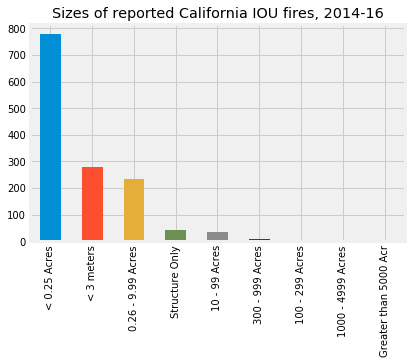

In [35]:
pd.value_counts(alliou["Size_clean"]).plot.bar()
plt.title("Sizes of reported California IOU fires, 2014-16");

The fires skew to the smaller sizes, with < 0.25 Acres representing over half of the dataset.

**Question 2.5:** Use `plot()` to view the distribution of fire start dates in the `alliou` dataframe. Are there periods of time when fires occur more frequently?

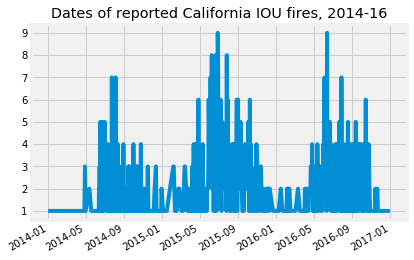

In [36]:
pd.value_counts(alliou["Fire Start Date"]).plot()
plt.title("Dates of reported California IOU fires, 2014-16");

There is a consistent spike in fire incidents between May and September of each year.

**Question 2.6**: Look at the `Was There an Outage` field. Perform any necessary data cleaning operations, then use `plot().bar()` to show how frequently the field was marked "yes" or "no" in the whole dataset.

In [37]:
alliou["Was There an Outage"] = alliou["Was There an Outage"].str.lower()

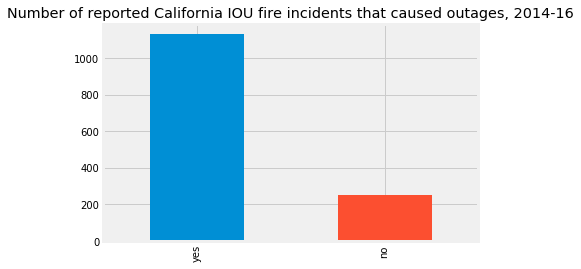

In [38]:
pd.value_counts(alliou["Was There an Outage"]).plot.bar()
plt.title("Number of reported California IOU fire incidents that caused outages, 2014-16");

<br>

----

## Section 3. Summarizing data<a id='summarize'></a>

One of the CPUC's goals when collecting this data is to identify operational and environmental trends related to fire incidents, with the objective of improving regulations and internal standards for utilities. In this section, you'll create a two new dataframes: one that summarizes fire incident data by equipment type, and another that summarizes weather data by month. In the process, you'll gain more experience with using `.groupby()` along with summarizing data that is non-numerical or doesn't lend itself as well to `.groupby()`. 
<br>

**Question 3.1:** Define a new dataframe, `alliou_equipment`, that contains a single column with every unique value for "Equipment Involved With Ignition".

In [39]:
alliou_equipment = pd.DataFrame()
alliou_equipment["Equipment Involved With Ignition"] = alliou["Equipment Involved With Ignition"].unique()

In [40]:
alliou_equipment

,Equipment Involved With Ignition
0,Conductor
1,Capacitor Bank
2,Transformer
3,Other
4,Unknown
5,Fuse
6,Lightning Arrestor
7,Switch


**Question 3.2a:** The first set of values that we want to add to the dataframe is a count of the total number of fire incidents associated with each equipment type. Start by using `groupby().size()` to get a count of records for each equipment type and save it to variable `counts`.

In [41]:
counts = alliou.groupby(["Equipment Involved With Ignition"]).size()

In [42]:
counts

Equipment Involved With Ignition
Capacitor Bank          31
Conductor             1151
Fuse                    17
Lightning Arrestor      16
Other                   83
Switch                  11
Transformer             48
Unknown                 27
dtype: int64

**Question 3.2b**: Now we want to put the values from `counts` into a new column in dataframe `alliou_equipment`. Do this below, making sure the right values from `counts` map to the correct equipment types. The resulting `alliou_equipment` dataframe should have two columns, one for equipment and one for the count of fire incidents.<br>

In [43]:
# there are a lot of ways to do this - but since the equipment in counts is sorted alphabetically, 
# I'm going to sort the equipment names in the dataframe as well and then add the values
alliou_equipment.sort_values(by = ["Equipment Involved With Ignition"], inplace = True)
alliou_equipment["Fire incident count"] = counts.values

# NOTE: for this question and the next, answers that hard-coded the values into the dataframe 
# (eg. alliou_equipment["Fire incident count"] = [31, 1151, ...]) did not receive full marks

In [44]:
alliou_equipment

,Equipment Involved With Ignition,Fire incident count
1,Capacitor Bank,31
0,Conductor,1151
5,Fuse,17
6,Lightning Arrestor,16
3,Other,83
7,Switch,11
2,Transformer,48
4,Unknown,27


**Question 3.3a** Next, we want to find out what percentage of fire incidents involving each equipment lead to outages. Add a column called "% Outage" to `alliou_equipment` that provides this value. There are lots of ways to approach finding the percentage of fire incidents that led to outages per equipment type, but some helpful functions might be `groupby()` and `np.divide()`.

In [45]:
# get a count for number of outages per equipment type
outage_counts = alliou[alliou["Was There an Outage"] == "yes"].groupby(
    ["Equipment Involved With Ignition"]).size()

alliou_equipment["% Outage"] = np.divide(outage_counts.values,alliou_equipment["Fire incident count"])*100

alliou_equipment

,Equipment Involved With Ignition,Fire incident count,% Outage
1,Capacitor Bank,31,48.387097
0,Conductor,1151,85.403997
5,Fuse,17,70.588235
6,Lightning Arrestor,16,68.750000
3,Other,83,60.240964
7,Switch,11,90.909091
2,Transformer,48,72.916667
4,Unknown,27,59.259259


**Question 3.3b**: You're working for the CPUC, and as you're exploring the fire incident data a colleague notices that almost 91% of fire incidents involving switches lead to outages. Your colleague concludes that the focus of the commission should be to work with utilities to inspect and revise switch maintenance and operation procedures. Do you agree with your colleague? Why or why not? Is there any additional data that you would want to collect before deciding where to focus maintenance review efforts? <br>
*Note*: you don't have to reference or have a knowledge of electrical equipment to answer this - think more about what the data does or doesn't tell you.

There are many acceptable answers here, but students should answer the first two questions (if they agree and why/why not), discuss data limitations (potentially discussing the small sample size of switch-related incidents or missing information like the number of affected customers in each outage), and discuss additional data collection.

**Question 3.4** We'd also like to explore monthly weather trends. To start off, create a new column in `alliou` called "Fire Start Month" that includes the month of the fire incident (the `.dt.month` method is helfpul here).

In [46]:
alliou["Fire Start Month"] = alliou["Fire Start Date"].dt.month

In [47]:
alliou.head()

,Utility Name,Fire Start Date,Fire Start Time,Latitude,Longitude,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,Size_clean,Fire Start Month
0,PG&E,2014-06-10,15:14,40.206,-122.253,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,NaN,"12,000",Conductor,Overhead,yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55,< 0.25 Acres,6
1,PG&E,2014-06-12,6:30,38.0438,-122.746,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52,10 - 99 Acres,6
2,PG&E,2014-06-13,9:19,36.9335,-121.389,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54,< 0.25 Acres,6
3,PG&E,2014-06-14,8:47,37.419,-122.181,Vegetation,Rural,< 3 meters,Unknown,NaN,100275552,AT&T,"12,000",Conductor,Overhead,yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,< 3 meters,6
4,PG&E,2014-06-14,11:01,37.1309,-121.092,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,NaN,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,10 - 99 Acres,6


In [48]:
assert alliou.shape[1] == 33

**Question 3.5** Use `.groupby()` to create a dataframe, `alliou_monthly`, that shows *average* weather data values for each month and utility. To do so, you'll need to give `.groupby()` two arguments in the form of a list.<br>
*Note*: You'll notice that the dataframe `alliou_monthly` will only provide grouped data for the weather-related variables, since none of the variables in the IOU dataset are stored as numbers (and so we can't calculate their mean).

In [49]:
alliou_month = alliou.groupby(["Fire Start Month", "Utility Name"]).mean()

In [50]:
alliou_month

AWND      PRCP       TAVG       TMAX  \
Fire Start Month Utility Name                                             
1                PG&E               NaN  0.001667        NaN  61.500000   
                 SCE           4.623333  0.176667        NaN  67.833333   
                 SDG&E         6.398000  0.028000  56.800000  63.800000   
2                PG&E               NaN  0.127059        NaN  65.294118   
                 SCE           5.722500  0.040833        NaN  80.916667   
                 SDG&E         3.297500  0.000000  63.500000  76.250000   
3                PG&E               NaN  0.000000        NaN  70.571429   
                 SCE           5.462857  0.040000        NaN  82.857143   
                 SDG&E         5.590000  0.037500  62.750000  68.250000   
4                PG&E               NaN  0.038222        NaN  64.666667   
                 SCE           6.203529  0.015294        NaN  80.764706   
                 SDG&E         5.710588  0.000000  65.941176  75.882353   
5                PG&E               NaN  0.001250        NaN  63.027778   
                 SCE           5.066154  0.016538        NaN  79.961538   
                 SDG&E         6.877500  0.000000  70.875000  79.250000   
6                PG&E               NaN  0.001611        NaN  67.668246   
                 SCE           5.089756  0.000000        NaN  91.439024   
                 SDG&E         6.167143  0.000000  68.428571  74.000000   
7                PG&E               NaN  0.000837        NaN  67.556650   
                 SCE           4.881739  0.001304        NaN  93.956522   
                 SDG&E         6.469231  0.000000  70.846154  75.846154   
8                PG&E               NaN  0.000706        NaN  69.005882   
                 SCE           4.591765  0.001176        NaN  96.176471   
                 SDG&E         5.851667  0.000000  74.166667  80.833333   
9                PG&E               NaN  0.008239        NaN  71.584507   
                 SCE           4.362273  0.004091        NaN  96.409091   
                 SDG&E         5.532667  0.000000  76.066667  83.000000   
10               PG&E               NaN  0.028929        NaN  72.008929   
                 SCE           4.643810  0.018571        NaN  88.523810   
                 SDG&E         3.493750  0.000000  74.500000  85.750000   
11               PG&E               NaN  0.077895        NaN  65.263158   
                 SCE           4.592632  0.007368        NaN  78.578947   
                 SDG&E         3.580000  0.000000  65.666667  75.000000   
12               PG&E               NaN  0.166190        NaN  58.000000   
                 SCE           6.007143  0.217143        NaN  65.214286   
                 SDG&E         8.050000  0.000000  54.000000  64.000000   

                                    TMIN  
Fire Start Month Utility Name             
1                PG&E          50.666667  
                 SCE           45.500000  
                 SDG&E         50.000000  
2                PG&E          53.294118  
                 SCE           50.833333  
                 SDG&E         52.000000  
3                PG&E          53.928571  
                 SCE           52.714286  
                 SDG&E         57.500000  
4                PG&E          51.755556  
                 SCE           52.911765  
                 SDG&E         58.823529  
5                PG&E          51.611111  
                 SCE           55.769231  
                 SDG&E         63.250000  
6                PG&E          53.924171  
                 SCE           63.585366  
                 SDG&E         64.285714  
7                PG&E          56.463054  
                 SCE           66.260870  
                 SDG&E         66.769231  
8                PG&E          57.976471  
                 SCE           66.470588  
                 SDG&E         69.833333  
9                PG&E          57.387324  
                 SCE   

**Question 3.6:** Define a function `temp_range()` that takes as input the month of the year (as a number) and the utility name (as a string) and returns the difference between the average maximum and average minimum temperature for that service area and month, rounded to one decimal place. Check out the [MultiIndex documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index) for more information on how to use `.loc()` to access the values you want.

In [51]:
def temp_range(month, utility):
    """
    Calculate the difference between the average maximum temperature and average minimum temperature for a given utility's land-based temperature measurement in a certain month.
    
    Args:
        month, an integer representing the month of the year
        utility, a string representing the utility (acceptable values are "PG&E", "SCE", and "SDG&E")
    
    Returns:
        The difference between average maximum and minium temperature, rounded to one decimal place (float)
    """
    
    maxtemp = alliou_month.loc[(month, utility)]["TMAX"]
    mintemp = alliou_month.loc[(month, utility)]["TMIN"]
    return round(maxtemp-mintemp, 1)

In [52]:
print(temp_range(11, "SCE"))
print(temp_range(1, "PG&E"))

27.3
10.8


----

## Submission

Congrats, you're done with homework 3!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file **as both an .html and .ipynb file through bCourses**.

----

## Bibliography

- CPUC Fire Incident Data Collection: https://www.cpuc.ca.gov/fireincidentsdata/
- NOAA Daily Summary Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf